In [1]:
!pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.3 MB/s  0:00:00 3.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.8 MB/s  0:00:00 21.8 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=ca43909e391391265007dee8e95d65c7c47b9bc41f3432559896f83c2b11f18e
  Stored in directory: /Users/parkjuyong/Library/Caches/pip/wheels/1e/df/0f/e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
  Created wheel for peewee: filename=peewee-3.18.3-cp313-cp313-macosx_15_0_arm64.whl size=283977 sha256=3ad4c1adfeba985a6a85381e1fc9f690da1720113208ddef9e1dcc1a76713170
  Stored in directory: /Users/parkjuyong/Library/Caches/pip/wheels/8c/a9/a4/df

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
name = 'GOOG'

start_day = '2021-01-01'
end_day = '2024-08-01'

In [4]:
stock = yf.download(name, start=start_day, end=end_day)

/var/folders/dc/3dqm8vys2qv2c52_q3sn76xr0000gn/T/ipykernel_81841/3346645531.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(name, start=start_day, end=end_day)
[*********************100%***********************]  1 of 1 completed


In [5]:
print(stock.shape)
stock.head()

(899, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.824684,87.434169,84.812113,87.279723,38038000
2021-01-05,86.454369,86.789576,85.316904,85.663781,22906000
2021-01-06,86.174782,86.805960,84.372608,84.552878,52042000
2021-01-07,88.755119,88.812224,86.262177,86.411652,45300000
2021-01-08,89.746338,89.876944,88.074036,88.791378,41012000


In [6]:
stock2 = pd.DataFrame(stock['Close'])
stock2.head()

Ticker,GOOG
Date,
2021-01-04,85.824684
2021-01-05,86.454369
2021-01-06,86.174782
2021-01-07,88.755119
2021-01-08,89.746338


In [7]:
stock2.to_csv('/Users/parkjuyong/Desktop/4-1/Data Crawling/practice/week11/14장_data/'+name+'.csv')

In [9]:
stock2.reset_index()
stock_values = stock2.values
print(stock_values[0])

[85.82468414]


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_values_scaled = scaler.fit_transform(stock_values)

stock_values_scaled[0]

array([0.02671214])

In [14]:
n_train = int(len(stock_values)*0.8)
n_test = len(stock_values) - n_train

print(n_train, n_test)

719 180


In [15]:
X_train, Y_train = [],[]

# 20일간 구간의 주가를 x값으로 하고, 그 다음날 값을 y값으로 정리
for i in range(20, n_train):
    X_train.append(stock_values_scaled[i-20:i,0])
    Y_train.append(stock_values_scaled[i,0])

X_train[0]

array([0.02671214, 0.0325079 , 0.02993452, 0.05368452, 0.06280792,
       0.04430067, 0.03508128, 0.03866944, 0.0321697 , 0.03034595,
       0.05533455, 0.09923291, 0.10122126, 0.1057007 , 0.10494644,
       0.11310083, 0.07358605, 0.08835893, 0.07584855, 0.10583777])

In [16]:
X_train1, Y_train1 = np.array(X_train), np.array(Y_train)
X_train2 = np.reshape(X_train1, (X_train1.shape[0],X_train1.shape[1],1))

print(X_train2.shape)
X_train[0]

(699, 20, 1)


array([0.02671214, 0.0325079 , 0.02993452, 0.05368452, 0.06280792,
       0.04430067, 0.03508128, 0.03866944, 0.0321697 , 0.03034595,
       0.05533455, 0.09923291, 0.10122126, 0.1057007 , 0.10494644,
       0.11310083, 0.07358605, 0.08835893, 0.07584855, 0.10583777])

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 16.1 MB/s  0:00:12 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 12.0 MB/s  0:00:00.3 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 13.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
lstm_stock = Sequential()

lstm_stock.add(LSTM(units=20, return_sequences=True, input_shape=(X_train2.shape[1],1)))
lstm_stock.add(LSTM(units=20, return_sequences=False))
lstm_stock.add(Dense(1))

/Users/parkjuyong/Desktop/4-1/Machine Learning/venvs/ML/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# 학습 매개변수 설정
lstm_stock.compile(loss='mean_squared_error',optimizer='adam')

# 학습 수행
lstm_stock.fit(X_train2, Y_train1, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
699/699 - 2s - 2ms/step - loss: 0.0027
Epoch 2/10
699/699 - 1s - 1ms/step - loss: 0.0017
Epoch 3/10
699/699 - 1s - 1ms/step - loss: 0.0013
Epoch 4/10
699/699 - 1s - 1ms/step - loss: 0.0011
Epoch 5/10
699/699 - 1s - 1ms/step - loss: 9.5057e-04
Epoch 6/10
699/699 - 1s - 1ms/step - loss: 8.2567e-04
Epoch 7/10
699/699 - 1s - 1ms/step - loss: 8.0166e-04
Epoch 8/10
699/699 - 1s - 1ms/step - loss: 7.1187e-04
Epoch 9/10
699/699 - 1s - 1ms/step - loss: 6.2486e-04
Epoch 10/10
699/699 - 1s - 1ms/step - loss: 6.4945e-04


In [23]:
stock_test = stock_values_scaled[n_train-20:]
X_test=[]

for i in range(20,len(stock_test)):
    X_test.append(stock_test[i-20:i,0])

X_test[0]

array([0.50361468, 0.52107526, 0.52564605, 0.51001379, 0.50727117,
       0.48679382, 0.49739829, 0.51769263, 0.39473725, 0.36520967,
       0.36484395, 0.38632696, 0.38221325, 0.40296481, 0.4121979 ,
       0.42856154, 0.43843442, 0.447119  , 0.45498071, 0.44062846])

In [27]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

print(X_test.shape)
print(X_test[0])

(180, 20, 1)
[[0.50361468]
 [0.52107526]
 [0.52564605]
 [0.51001379]
 [0.50727117]
 [0.48679382]
 [0.49739829]
 [0.51769263]
 [0.39473725]
 [0.36520967]
 [0.36484395]
 [0.38632696]
 [0.38221325]
 [0.40296481]
 [0.4121979 ]
 [0.42856154]
 [0.43843442]
 [0.447119  ]
 [0.45498071]
 [0.44062846]]


In [28]:
predicted_value = lstm_stock.predict(X_test)

predicted_value[0]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([0.40044418], dtype=float32)

In [29]:
predicted_value = scaler.inverse_transform(predicted_value)

predicted_value[0]

array([126.429085], dtype=float32)

In [30]:
stock_train_vis = stock[:n_train]
stock_test_vis = stock[n_train:]
stock_test_vis['Predictions'] = predicted_value

/var/folders/dc/3dqm8vys2qv2c52_q3sn76xr0000gn/T/ipykernel_81841/2531245371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_vis['Predictions'] = predicted_value


In [31]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GOOG(2021-01-01~2024-08-01)')

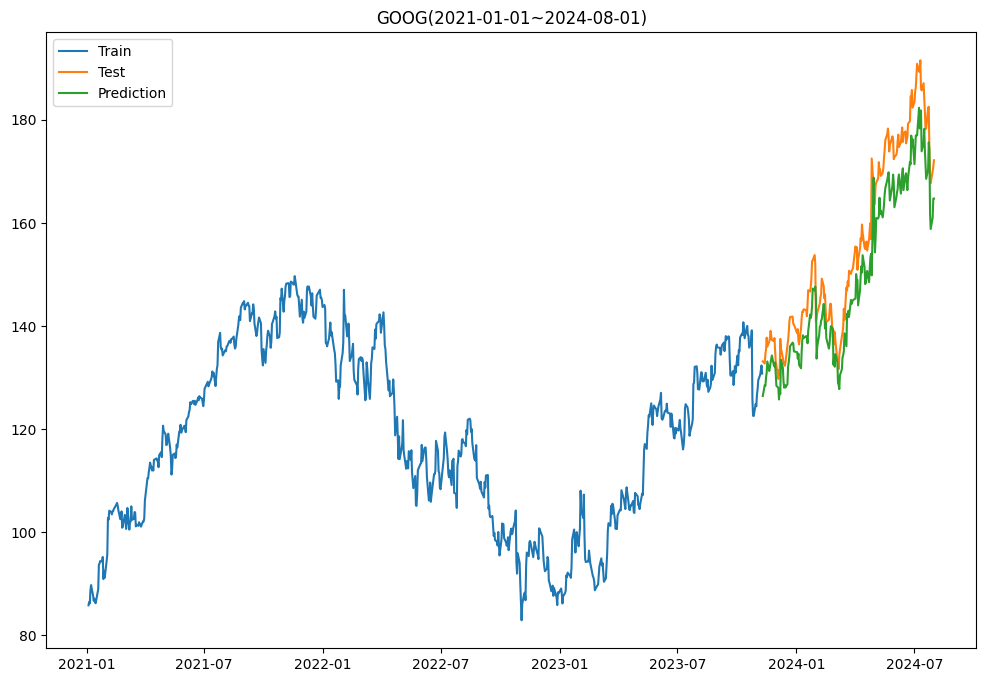

In [34]:
plt.figure(figsize=(12,8))
plt.plot(stock_train_vis['Close'], label='Train')
plt.plot(stock_test_vis['Close'], label='Test')
plt.plot(stock_test_vis['Predictions'], label = 'Prediction')
plt.legend()
plt.title(name + '(' + start_day + '~' + end_day + ')')